In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2025-05-21 20:45:50.036344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747840550.058579   16515 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747840550.065231   16515 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747840550.084153   16515 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747840550.084186   16515 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747840550.084189   16515 computation_placer.cc:177] computation placer alr

In [2]:
base_path = r"/home/deeptanshu/Desktop/soil-classification/soil_classification-2025"  

train_csv = pd.read_csv(os.path.join(base_path, "train_labels.csv"))
train_images_dir = os.path.join(base_path, "train")
test_csv = pd.read_csv(os.path.join(base_path, "test_ids.csv"))
test_images_dir = os.path.join(base_path, "test")


In [3]:
train_csv.head()

,image_id,soil_type
0,img_ed005410.jpg,Alluvial soil
1,img_0c5ecd2a.jpg,Alluvial soil
2,img_ed713bb5.jpg,Alluvial soil
3,img_12c58874.jpg,Alluvial soil
4,img_eff357af.jpg,Alluvial soil


In [4]:
image_size = (224, 224)

X = []
y = []

for i, row in train_csv.iterrows():
    img_path = os.path.join(train_images_dir, row['image_id'])
    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img) / 255.0  
    X.append(img)
    y.append(row['soil_type'])

X = np.array(X)
y = pd.Categorical(y).codes  
y = to_categorical(y)   

In [5]:
test_images_dir = os.path.join(base_path, "test")
test_csv = pd.read_csv(os.path.join(base_path, "test_ids.csv"))

X_test = []

for i, row in test_csv.iterrows():
    img_path = os.path.join(test_images_dir, row['image_id'])
    img = load_img(img_path, target_size=image_size)
    img = img_to_array(img) / 255.0  
    X_test.append(img)

X_test = np.array(X_test)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=33)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  
])

/home/deeptanshu/Desktop/soil-classification/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1747840559.028919   16515 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

2025-05-21 20:45:59.202551: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 588263424 exceeds 10% of free system memory.


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 523ms/step - accuracy: 0.4989 - loss: 3.0982 - val_accuracy: 0.7388 - val_loss: 0.5838
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 509ms/step - accuracy: 0.7776 - loss: 0.6004 - val_accuracy: 0.8408 - val_loss: 0.4278
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 510ms/step - accuracy: 0.8731 - loss: 0.3637 - val_accuracy: 0.9224 - val_loss: 0.2243
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 517ms/step - accuracy: 0.9301 - loss: 0.1937 - val_accuracy: 0.9347 - val_loss: 0.2406
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 517ms/step - accuracy: 0.9507 - loss: 0.1599 - val_accuracy: 0.9429 - val_loss: 0.1868
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step - accuracy: 0.9671 - loss: 0.0996 - val_accuracy: 0.9143 - val_loss: 0.2801
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 509ms/step - accuracy: 0.9579 - loss: 0.1224 - val_accuracy: 0.9633 - val_loss: 0.1277
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 509ms/step - accuracy: 0.9787 - loss: 0.0660 - val_accu

In [10]:
preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
label_map = dict(enumerate(pd.Categorical(train_csv['soil_type']).categories))
final_preds = [label_map[i] for i in pred_labels]

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [11]:
submission = pd.DataFrame({
    'image_id': test_csv['image_id'],
    'soil_type': final_preds

})

submission.to_csv("submission.csv", index=False)


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

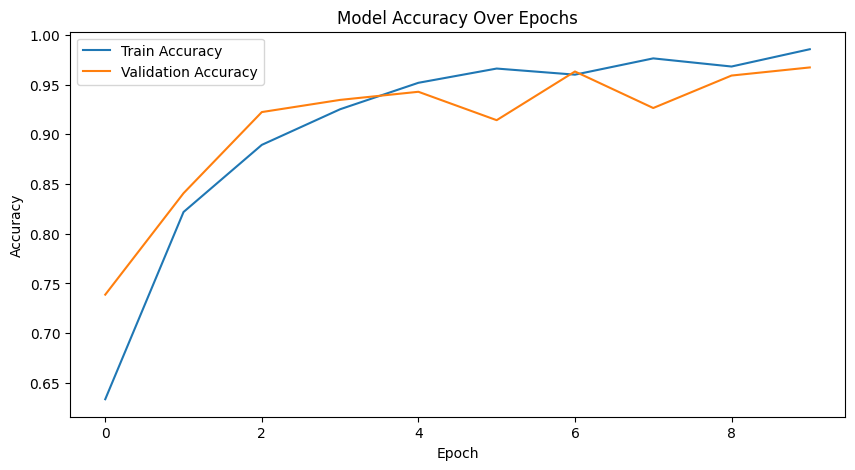

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

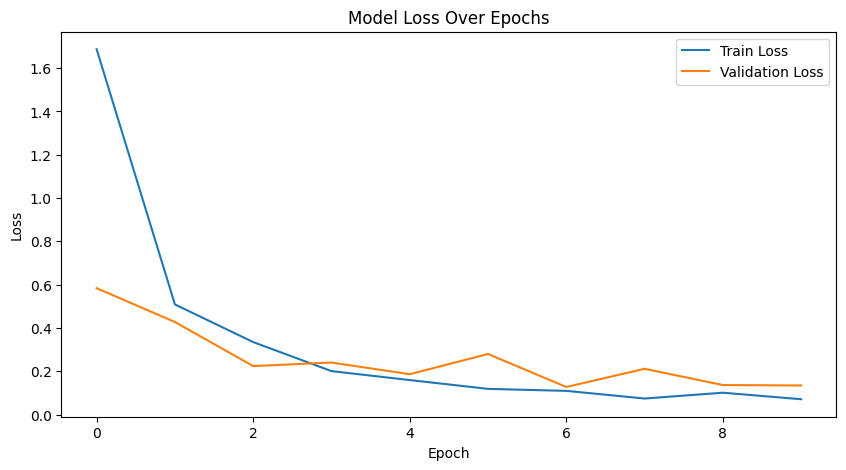

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid